# Data analysis of players in FIFA 2019

This data science project is based on FIFA 2019 dataset from : https://www.kaggle.com/karangadiya/fifa19 .
We will try to address the following questions
Q1. Is there any correlation between age and player points?
Q2. Which country has the average highest player points?
Q3. Which club has the average highest player points?
Q4. How strongly the number of wages and value correlates with points?
Q5. How strongly price of players correlates with points?
Commands are used from : https://github.com/souticksaha21/Python_codes/blob/main/Pandas_commands.ipynb


In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
#Let us read the datafile with proper indexing
FIFA_19 = pd.read_csv("FIFA_2019.csv", index_col=0)

In [4]:
#Let us print the first few rows
FIFA_19.head(4)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M


In [5]:
#Description of the columns
FIFA_19.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
#Let us rename some columns
FIFA_19_renamed=FIFA_19.rename(columns={'Overall': 'Overall points'})
FIFA_19=FIFA_19_renamed.rename(columns={'Potential': 'Potential points'})

In [7]:
#Check all column names
FIFA_19.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall points',
       'Potential points', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
age_list=FIFA_19.Age.tolist()

In [9]:
age_list[0:10]

[31, 33, 26, 27, 27, 27, 32, 31, 32, 25]

In [10]:
#Checking rows with no points
data_points_isnull=pd.isnull(FIFA_19["Overall points"])
FIFA_19[data_points_isnull]

,ID,Name,Age,Photo,Nationality,Flag,Overall points,Potential points,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [11]:
#Checking rows with no points
data_points_isnull=pd.isnull(FIFA_19["Age"])
FIFA_19[data_points_isnull]

,ID,Name,Age,Photo,Nationality,Flag,Overall points,Potential points,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [12]:
#Corresponding points
point_list=FIFA_19["Overall points"].tolist()

In [13]:
point_list[0:10]

[94, 94, 92, 91, 91, 91, 91, 91, 91, 90]

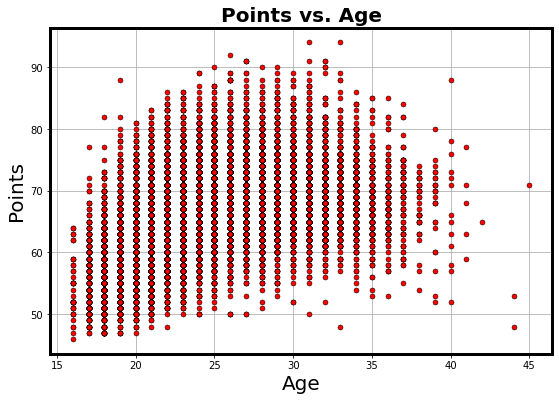

In [14]:
#Plotting age vs points
plt.plot(age_list, point_list,'mo', markersize=5, markerfacecolor='r',markeredgewidth=0.5,  markeredgecolor='k')
plt.xlabel("Age", fontsize=20)
plt.ylabel("Points", fontsize=20)
plt.title("Points vs. Age", fontsize=20, fontweight='bold')
plt.gcf().set_size_inches(9, 6)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.show()

In [15]:
#Seems like there is not much correlation between points and age. But to make the trends clearer we can plot
#Average point and standard deviation for each age by group by function
point_by_age_mean=FIFA_19.groupby('Age')["Overall points"].mean()

In [16]:
point_by_age_std=FIFA_19.groupby('Age')["Overall points"].std()
point_by_age_count=FIFA_19.groupby('Age')["Overall points"].count()

In [17]:
#Average point and standard deviation for each age by group by function
FIFA_19_points_by_age=FIFA_19.groupby('Age')["Overall points"].describe()

In [18]:
type(point_by_age_mean)

pandas.core.series.Series

In [19]:
FIFA_19_points_by_age

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
16,42.0,54.452381,4.784132,46.0,51.25,53.5,57.75,64.0
17,289.0,56.404844,5.234645,47.0,52.00,56.0,60.00,77.0
18,732.0,57.741803,5.506892,47.0,54.00,57.0,61.00,82.0
19,1024.0,59.583008,5.826839,47.0,55.00,59.0,63.00,88.0
20,1240.0,61.858871,5.895807,47.0,58.00,61.0,65.00,81.0
21,1423.0,63.480675,6.324401,48.0,59.00,63.0,67.00,83.0
22,1340.0,64.994030,6.096556,48.0,61.00,64.0,69.00,86.0
23,1332.0,66.244745,6.171005,50.0,62.00,66.0,70.00,86.0
24,1358.0,67.306333,5.892213,50.0,63.00,67.0,71.00,89.0


In [20]:
FIFA_19_points_by_age["count"]

Age
16      42.0
17     289.0
18     732.0
19    1024.0
20    1240.0
21    1423.0
22    1340.0
23    1332.0
24    1358.0
25    1319.0
26    1387.0
27    1162.0
28    1101.0
29     959.0
30     917.0
31     707.0
32     574.0
33     408.0
34     404.0
35     196.0
36     127.0
37      82.0
38      37.0
39      25.0
40      13.0
41       5.0
42       1.0
44       2.0
45       1.0
Name: count, dtype: float64

In [21]:
#Convert the count to list
count_list=FIFA_19_points_by_age["count"].tolist()
count_list

[42.0,
 289.0,
 732.0,
 1024.0,
 1240.0,
 1423.0,
 1340.0,
 1332.0,
 1358.0,
 1319.0,
 1387.0,
 1162.0,
 1101.0,
 959.0,
 917.0,
 707.0,
 574.0,
 408.0,
 404.0,
 196.0,
 127.0,
 82.0,
 37.0,
 25.0,
 13.0,
 5.0,
 1.0,
 2.0,
 1.0]

In [22]:
#Extracting unique Age
age_list=list(FIFA_19_points_by_age.index.values)

In [23]:
#Convert the mean and std points to list
mean_points_list=FIFA_19_points_by_age["mean"].tolist()
std_points_list=FIFA_19_points_by_age["std"].tolist()

In [24]:
type(std_points_list[-1])

float

In [25]:
#replace nan by 0
for i in range(len(std_points_list)):
    if count_list[i]==1:
        std_points_list[i]=0

In [26]:
std_points_list

[4.784132212017907,
 5.234644613452058,
 5.506891692639553,
 5.826838529529179,
 5.895806530095653,
 6.32440068219886,
 6.09655641968046,
 6.171004957763299,
 5.892213210665227,
 5.906586384780376,
 5.740193155812749,
 5.818382783124651,
 5.78154124257755,
 5.708463741167608,
 5.400359179921847,
 5.958557002585863,
 5.746688327109313,
 5.680819973017378,
 5.198865675247311,
 5.594205344639269,
 5.5028824070346785,
 6.0417223465646,
 4.698411973749756,
 6.806124692755293,
 9.90273207575074,
 6.985699678629193,
 0,
 3.5355339059327378,
 0]

In [27]:
median_points_list=FIFA_19_points_by_age["50%"].tolist()


In [28]:
median_points_list

[53.5,
 56.0,
 57.0,
 59.0,
 61.0,
 63.0,
 64.0,
 66.0,
 67.0,
 67.0,
 68.0,
 69.0,
 69.0,
 69.0,
 69.0,
 70.0,
 69.0,
 69.0,
 69.0,
 68.0,
 67.0,
 70.0,
 68.0,
 70.0,
 66.0,
 68.0,
 65.0,
 50.5,
 71.0]

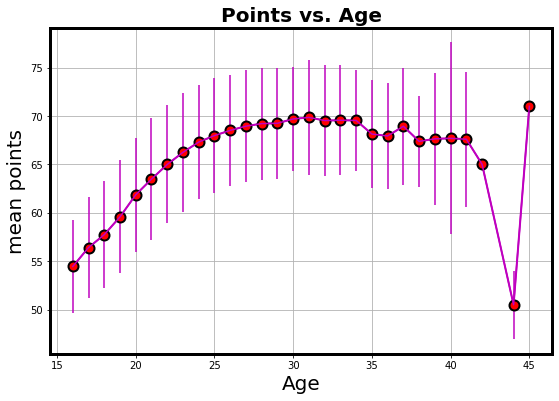

In [29]:
#plt.plot(age_list, mean_points_list,'mo-', markersize=10, markerfacecolor='r',markeredgewidth=2,  markeredgecolor='k', linewidth=2)
plt.plot(age_list, mean_points_list,'mo-', markersize=10, markerfacecolor='r',markeredgewidth=2,  markeredgecolor='k', linewidth=2)
plt.errorbar(age_list, mean_points_list, std_points_list, fmt='m');
plt.xlabel("Age", fontsize=20)
plt.ylabel("mean points", fontsize=20)
plt.title("Points vs. Age", fontsize=20, fontweight='bold')
plt.gcf().set_size_inches(9, 6)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.show()

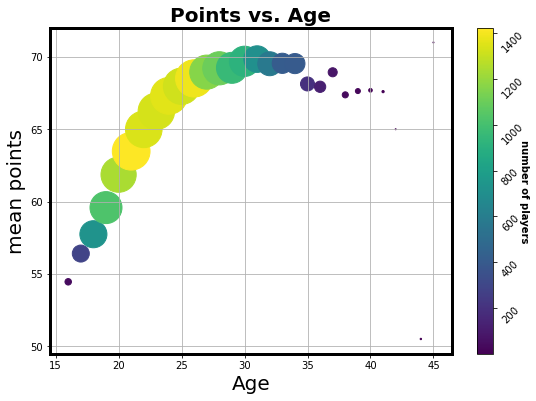

In [30]:
sc=plt.scatter(age_list, mean_points_list, count_list, count_list)
plt.xlabel("Age", fontsize=20)
plt.ylabel("mean points", fontsize=20)
plt.title("Points vs. Age", fontsize=20, fontweight='bold')
cbar=plt.colorbar(sc)
cbar.set_label('number of players', rotation=270, fontsize=10, fontweight='bold')
plt.gcf().set_size_inches(9, 6)
cbar.ax.tick_params(rotation=45)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.show()

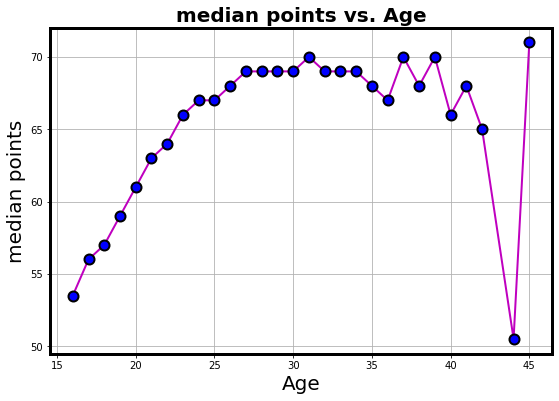

In [31]:
plt.plot(age_list, median_points_list,'mo-', markersize=10, markerfacecolor='b',markeredgewidth=2,  markeredgecolor='k', linewidth=2)
plt.xlabel("Age", fontsize=20)
plt.ylabel("median points", fontsize=20)
plt.title("median points vs. Age", fontsize=20, fontweight='bold')
plt.gcf().set_size_inches(9, 6)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.show()

In [32]:
#So the best time is between 25 and 35 years old.

In [33]:
#Let us now group by country
FIFA_19.groupby('Nationality')["Overall points"].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Afghanistan,4.0,61.000000,1.825742,59.0,59.75,61.0,62.25,63.0
Albania,40.0,65.925000,6.149369,52.0,62.75,67.0,69.25,81.0
Algeria,60.0,70.633333,5.644757,58.0,67.75,70.5,73.50,85.0
Andorra,1.0,62.000000,NaN,62.0,62.00,62.0,62.00,62.0
Angola,15.0,67.600000,5.207138,60.0,64.00,67.0,71.50,78.0
...,...,...,...,...,...,...,...,...
Uzbekistan,2.0,67.500000,10.606602,60.0,63.75,67.5,71.25,75.0
Venezuela,67.0,67.268657,5.853210,53.0,64.00,68.0,72.00,81.0
Wales,129.0,64.139535,6.780883,47.0,60.00,64.0,68.00,88.0


In [34]:
points_by_country=FIFA_19.groupby('Nationality')["Overall points"].describe()

In [35]:
#Sort by mean points from maximum to minimum value
points_by_country_sorted=points_by_country.sort_values(by='mean', ascending=False)

In [36]:
points_by_country_sorted[0:10]

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
United Arab Emirates,1.0,77.000000,NaN,77.0,77.00,77.0,77.00,77.0
Central African Rep.,3.0,73.333333,7.571878,68.0,69.00,70.0,76.00,82.0
Israel,14.0,72.142857,4.148348,65.0,69.25,71.5,74.50,80.0
Dominican Republic,2.0,72.000000,11.313708,64.0,68.00,72.0,76.00,80.0
São Tomé & Príncipe,1.0,72.000000,NaN,72.0,72.00,72.0,72.00,72.0
Oman,1.0,72.000000,NaN,72.0,72.00,72.0,72.00,72.0
Cape Verde,19.0,71.631579,4.284475,65.0,68.50,71.0,75.50,79.0
Portugal,322.0,71.344720,5.469467,57.0,68.00,71.0,74.00,94.0
Togo,12.0,71.333333,5.499311,63.0,67.25,71.0,76.25,79.0


In [37]:
country_list=list(points_by_country_sorted.index.values)

In [38]:
country_list[0:10]

['United Arab Emirates',
 'Central African Rep.',
 'Israel',
 'Dominican Republic',
 'São Tomé & Príncipe',
 'Oman',
 'Cape Verde',
 'Portugal',
 'Togo',
 'Brazil']

In [39]:
median_points_list=points_by_country_sorted["50%"].tolist()

In [40]:
mean_points_list=points_by_country_sorted["mean"].tolist()

In [41]:
std_points_list=points_by_country_sorted["mean"].tolist()

In [42]:
count_list=points_by_country_sorted["count"].tolist()

In [43]:
#replace nan by 0
for i in range(len(std_points_list)):
    if count_list[i]==1:
        std_points_list[i]=0

In [44]:
std_points_list[0:10]

[0,
 73.33333333333333,
 72.14285714285714,
 72.0,
 0,
 0,
 71.63157894736842,
 71.34472049689441,
 71.33333333333333,
 71.2515114873035]

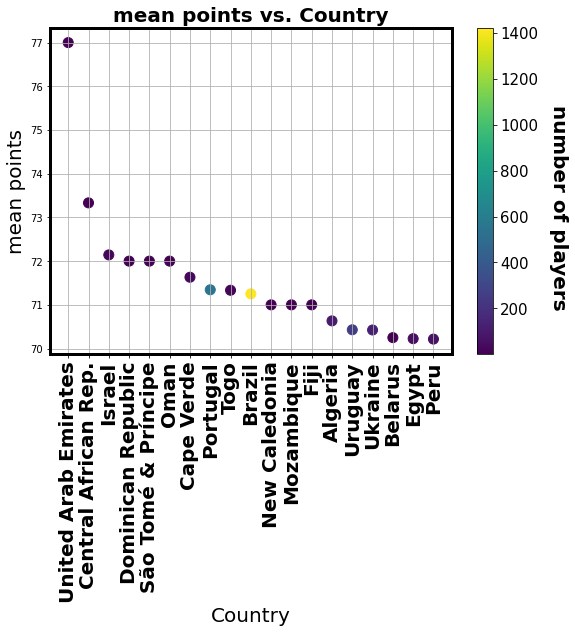

In [45]:
#This plot is the average points for top 20 countries
##Which country has the average highest player points?
x1=[i for i in range(len(count_list))]
country_num=20
fig=plt.scatter(x1[0:country_num-1], mean_points_list[0:country_num-1], 100, count_list[0:country_num-1])
plt.xticks(x1[0:country_num-1], country_list[0:country_num-1],rotation=90,fontsize=20, fontweight='bold')
plt.xlabel("Country", fontsize=20)
plt.ylabel("mean points", fontsize=20)
plt.title("mean points vs. Country", fontsize=20, fontweight='bold')
cbar=plt.colorbar(sc)
cbar.set_label('number of players', rotation=270, fontsize=20, fontweight='bold', labelpad=30, y=0.45)
cbar.ax.tick_params(rotation=0)
cbar.ax.tick_params(labelsize=15) 
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
#plt.rcParams["figure.figsize"] = (3,5)
plt.gcf().set_size_inches(9, 6)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()

In [46]:
points_by_club=FIFA_19.groupby('Club')["Overall points"].describe()

In [47]:
#Sort by mean points from maximum to minimum value
points_by_club_sorted=points_by_club.sort_values(by='mean', ascending=False)

In [48]:
points_by_club_sorted
club_list=list(points_by_club_sorted.index.values)

In [49]:
club_list[0:10]

['Juventus',
 'Napoli',
 'Inter',
 'Real Madrid',
 'Milan',
 'FC Barcelona',
 'Paris Saint-Germain',
 'Roma',
 'Manchester United',
 'FC Bayern München']

In [50]:
mean_points_list=points_by_club_sorted["mean"].tolist()
count_list=points_by_club_sorted["count"].tolist()

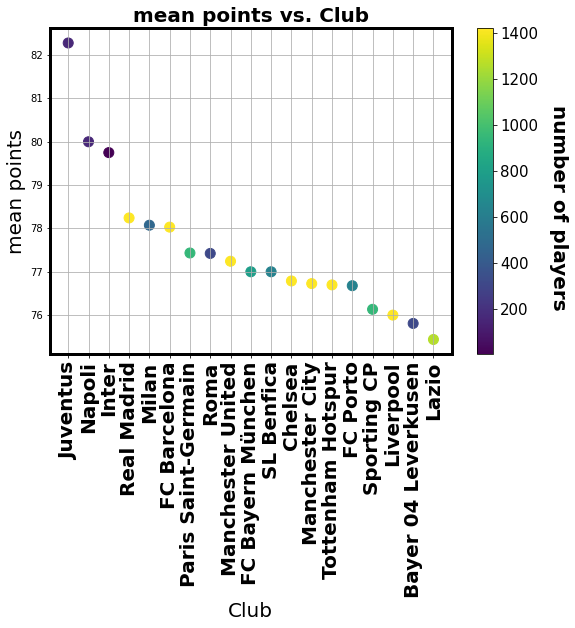

In [51]:
#This plot is the average points for top 20 clubs
##Which club has the average highest player points?
x1=[i for i in range(len(count_list))]
country_num=20
fig=plt.scatter(x1[0:country_num-1], mean_points_list[0:country_num-1], 100, count_list[0:country_num-1])
plt.xticks(x1[0:country_num-1], club_list[0:country_num-1],rotation=90,fontsize=20, fontweight='bold')
plt.xlabel("Club", fontsize=20)
plt.ylabel("mean points", fontsize=20)
plt.title("mean points vs. Club", fontsize=20, fontweight='bold')
cbar=plt.colorbar(sc)
cbar.set_label('number of players', rotation=270, fontsize=20, fontweight='bold', labelpad=30, y=0.45)
cbar.ax.tick_params(rotation=0)
cbar.ax.tick_params(labelsize=15) 
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.gcf().set_size_inches(9, 6)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()

In [52]:
#Let us check correlation between wages, value and points
points_full_list=FIFA_19["Overall points"].tolist()
wage_full_list=FIFA_19["Wage"].tolist()
value_full_list=FIFA_19["Value"].tolist()

In [53]:
value_full_list[0:10]

['€110.5M',
 '€77M',
 '€118.5M',
 '€72M',
 '€102M',
 '€93M',
 '€67M',
 '€80M',
 '€51M',
 '€68M']

In [54]:
wage_num_list=[]
for i in range(len(wage_full_list)):
    txt=wage_full_list[i].replace('K','')
    wage_num_list.append(float(txt.replace('€','')))

In [55]:
len(wage_num_list)

18207

In [56]:
value_num_list=[]
for i in range(len(value_full_list)):
    if 'M' in value_full_list[i]:
        txt=value_full_list[i].replace('M','')
        value_num_list.append(float(txt.replace('€','')))
    elif 'K' in value_full_list[i]:
        txt=value_full_list[i].replace('K','')
        value_num_list.append(0.001*float(txt.replace('€','')))
    else:
        value_num_list.append(0.001)

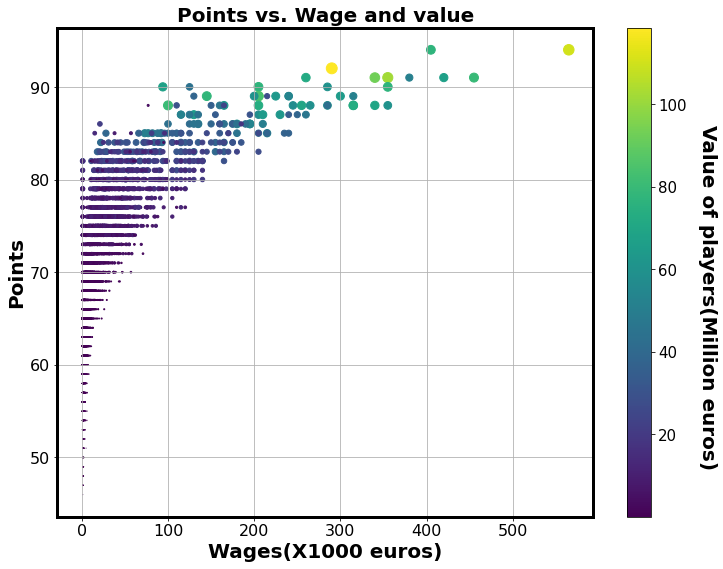

In [57]:
sc=plt.scatter(wage_num_list, points_full_list, value_num_list, value_num_list)
plt.xlabel("Wages(X1000 euros)", fontsize=20, fontweight='bold')
plt.ylabel("Points", fontsize=20, fontweight='bold')
plt.title("Points vs. Wage and value", fontsize=20, fontweight='bold')
cbar=plt.colorbar(sc)
cbar.set_label('Value of players(Million euros)', rotation=270, fontsize=20, fontweight='bold', labelpad=30, y=0.45)
cbar.ax.tick_params(rotation=0)
cbar.ax.tick_params(labelsize=15) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.gcf().set_size_inches(12, 9)
plt.grid()
plt.show()

In [58]:
#Wages and Value remain flat for most players with points below 85.
#But above ~85 points wages and value drastically increases. So there is no linear increase of wages with points.

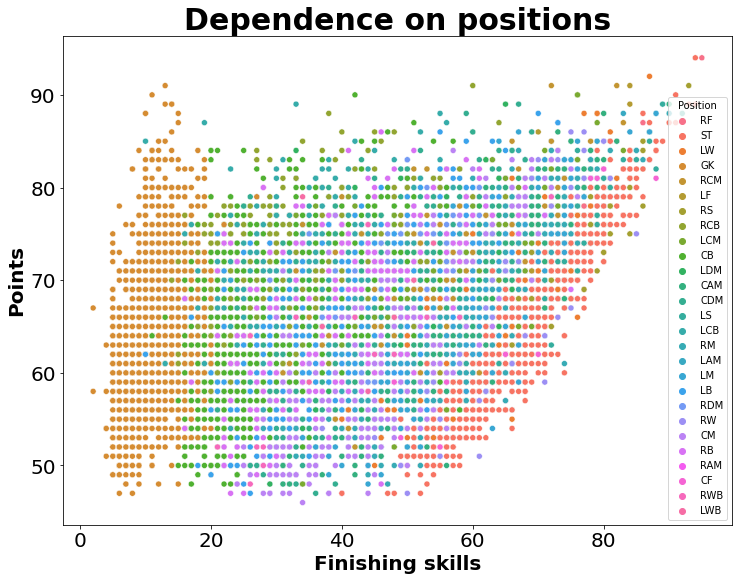

In [59]:
#What are the points, salaries and values by positions.
b=sns.scatterplot(x=FIFA_19["Finishing"], y=FIFA_19["Overall points"], hue=FIFA_19["Position"])
b.axes.set_title("Dependence on positions",fontsize=30, fontweight='bold')
b.set_xlabel("Finishing skills",fontsize=20, fontweight='bold')
b.set_ylabel("Points",fontsize=20, fontweight='bold')
plt.gcf().set_size_inches(12, 9)
b.tick_params(labelsize=20)

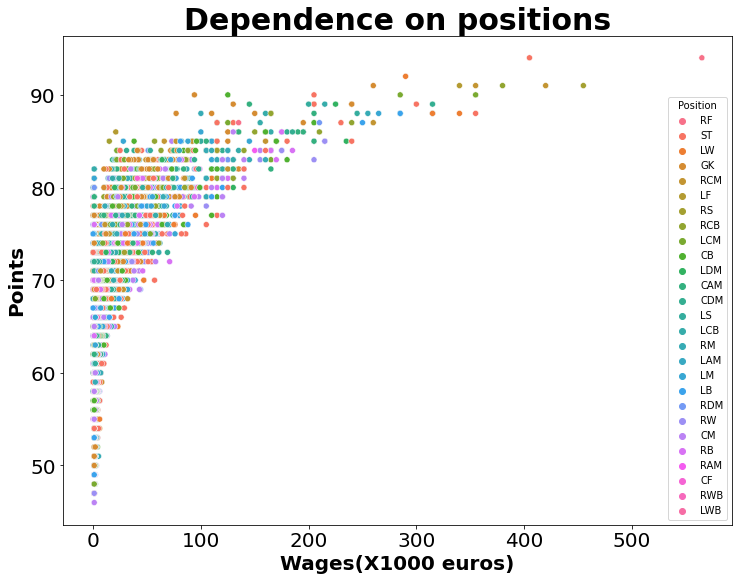

In [60]:
#What are the points, salaries and values by positions.
FIFA_19['Wage_for_plot'] = wage_num_list
b=sns.scatterplot(x=FIFA_19["Wage_for_plot"], y=FIFA_19["Overall points"], hue=FIFA_19["Position"])
b.axes.set_title("Dependence on positions",fontsize=30, fontweight='bold')
b.set_xlabel("Wages(X1000 euros)",fontsize=20, fontweight='bold')
b.set_ylabel("Points",fontsize=20, fontweight='bold')
plt.gcf().set_size_inches(12, 9)
b.tick_params(labelsize=20)

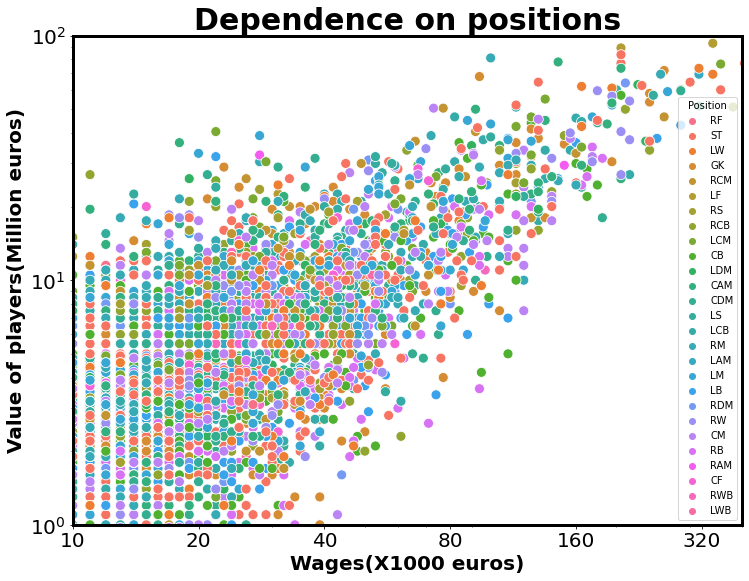

In [61]:
#What are the points, salaries and values by positions.
FIFA_19['Wage_for_plot'] = wage_num_list
FIFA_19['Value_for_plot'] = value_num_list
b=sns.scatterplot(x=FIFA_19["Wage_for_plot"], y=FIFA_19["Value_for_plot"], hue=FIFA_19["Position"], s=100)
b.axes.set_title("Dependence on positions",fontsize=30, fontweight='bold')
b.set_xlabel("Wages(X1000 euros)",fontsize=20, fontweight='bold')
b.set_ylabel("Value of players(Million euros)",fontsize=20, fontweight='bold')
b.tick_params(labelsize=20)
b.set(xscale="log", yscale="log")
b.set(xlim=(10, 400))
b.set(ylim=(1, 100))
b.set_xticks([10, 20, 40, 80, 160, 320])
b.set_xticklabels(['10', '20', '40', '80', '160', '320'])
plt.gcf().set_size_inches(12, 9)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

In [62]:
#checking correlations
FIFA_19.corr()

,ID,Age,Overall points,Potential points,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Wage_for_plot,Value_for_plot
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,...,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778,-0.204610,-0.138194
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,...,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313,0.141145,0.075023
Overall points,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,...,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276,0.571926,0.627086
Potential points,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,...,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341,0.486413,0.576218
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,...,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238,0.347835,0.377738
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,...,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444,0.668635,0.653177
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,...,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574,0.140849,0.165222
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,...,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925,0.263205,0.315651
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,...,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255,-0.086561,-0.095134
Crossing,-0.131994,0.130545,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,-0.076585,1.000000,...,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539,0.232834,0.249785


In [63]:
#Checking null values
FIFA_19.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKPositioning       48
GKReflexes          48
Release Clause    1564
Wage_for_plot        0
Value_for_plot       0
Length: 90, dtype: int64

In [64]:
FIFA_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall points            18207 non-null  int64  
 7   Potential points          18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [65]:
FIFA_19['GKPositioning'].dtypes

dtype('float64')

In [66]:
FIFA_19['GKPositioning'].dtypes=='object'

False

In [67]:
FIFA_19['GKPositioning'].isnull().sum()

48

In [68]:
FIFA_19.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall points',
       'Potential points', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [69]:
FIFA_19.columns[1]

'Name'

In [70]:
len(FIFA_19.columns)

90

In [71]:
for i in range(len(FIFA_19.columns)):
    null_values=FIFA_19[FIFA_19.columns[i]].isnull().sum()
    data_type=FIFA_19[FIFA_19.columns[i]].dtypes
    if null_values>0 and data_type=='float':
        mean_value=FIFA_19[FIFA_19.columns[i]].mean()
        FIFA_19[FIFA_19.columns[i]].fillna(mean_value, inplace = True)
        

In [72]:
FIFA_19.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKPositioning        0
GKReflexes           0
Release Clause    1564
Wage_for_plot        0
Value_for_plot       0
Length: 90, dtype: int64

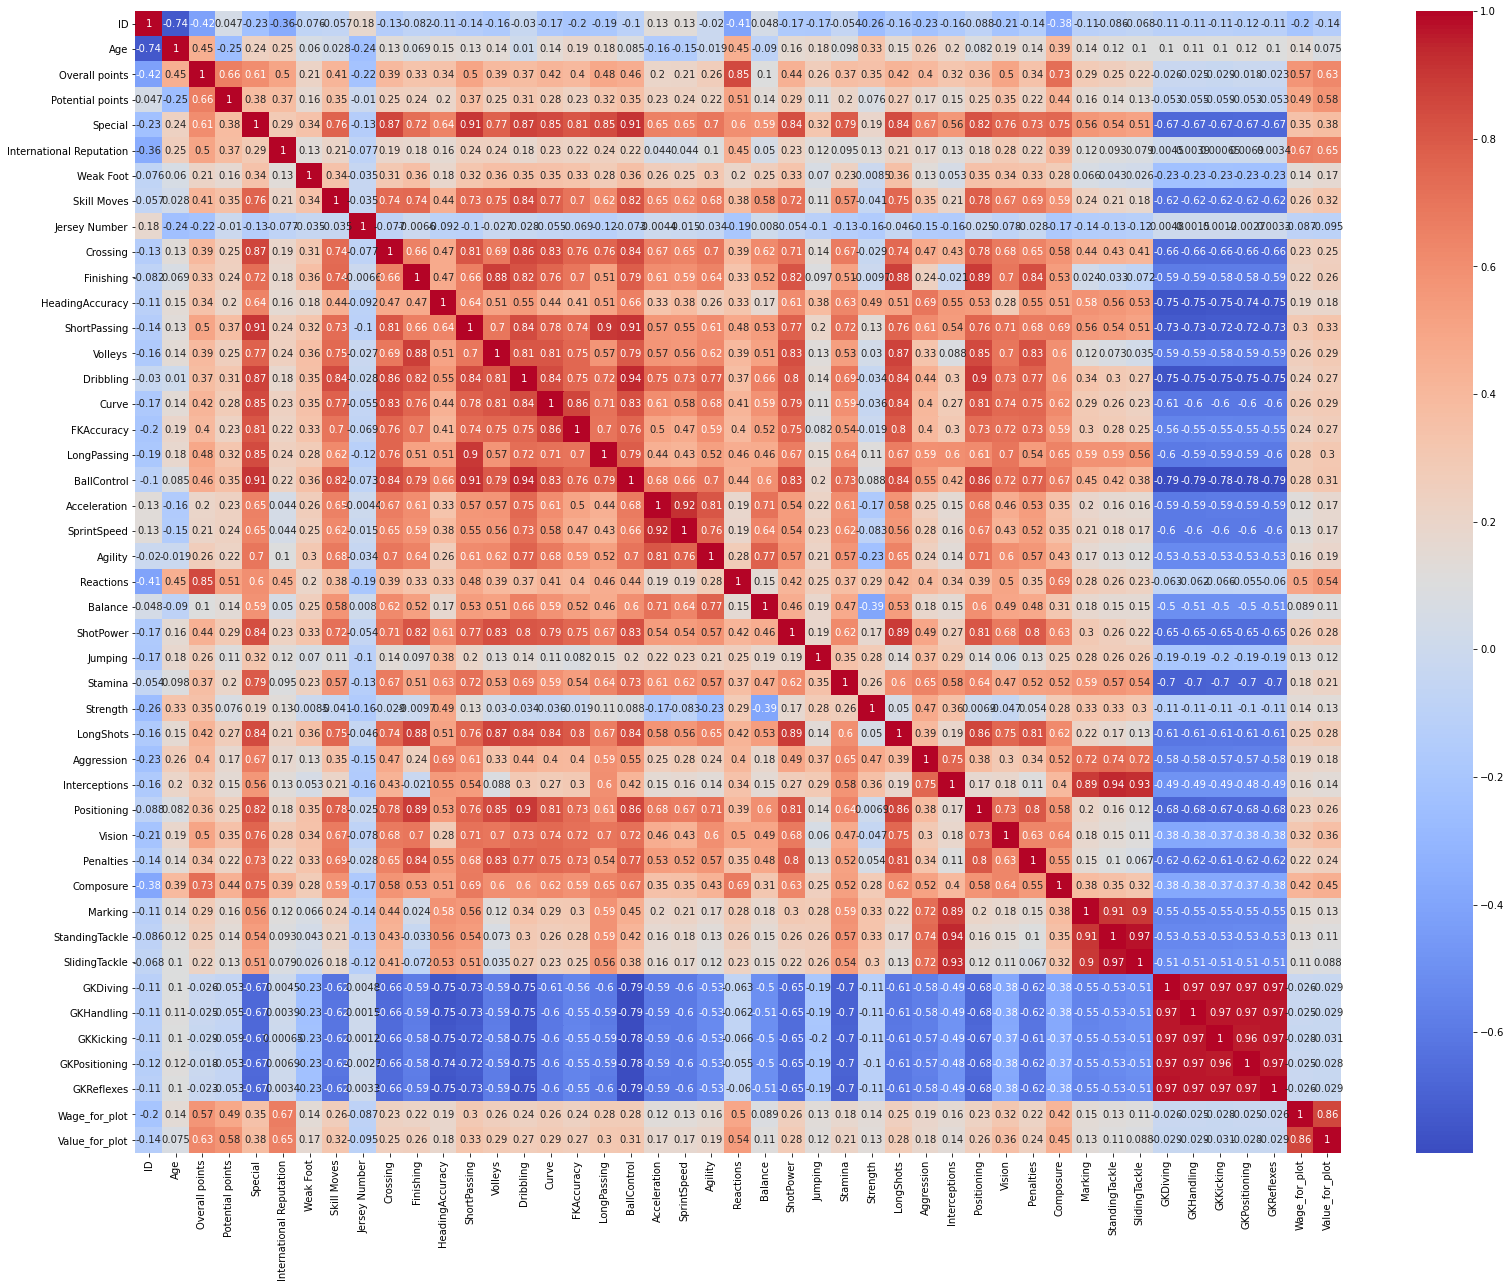

In [73]:
#Show correlation map
plt.figure(figsize=(27, 21))
correlations = FIFA_19.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

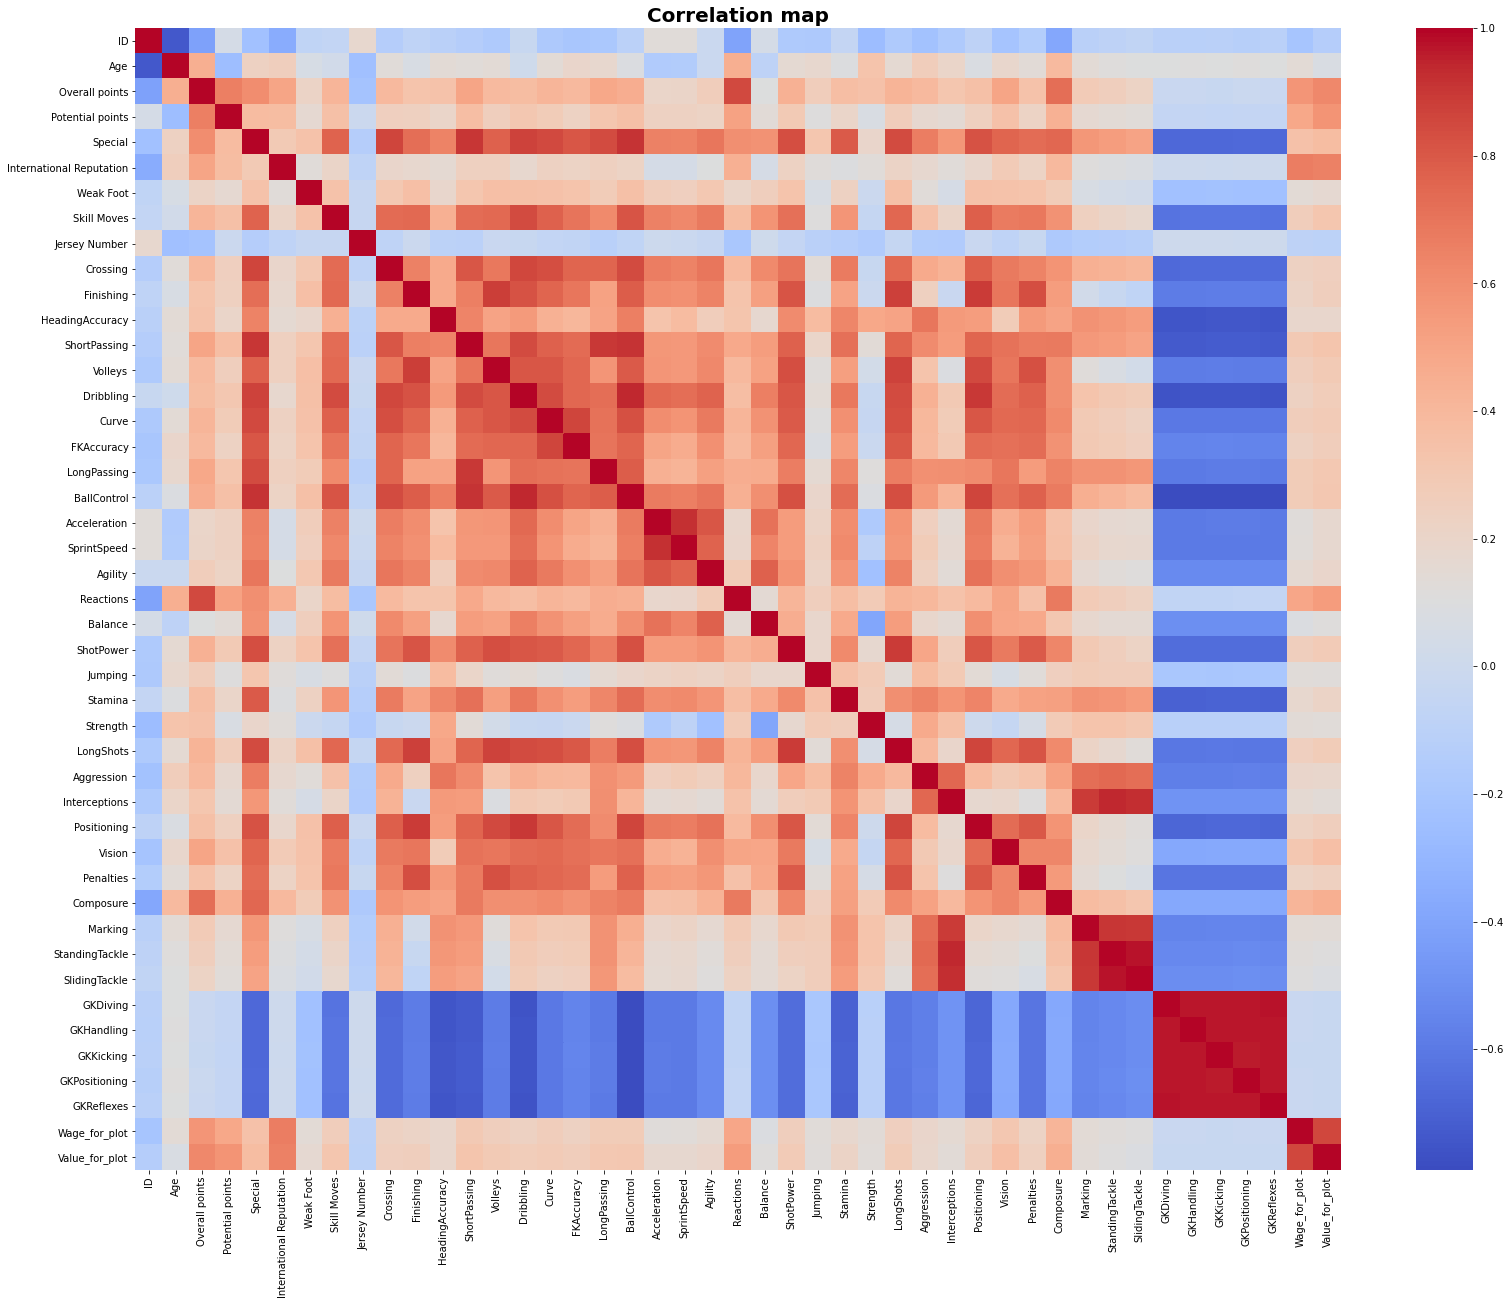

In [74]:
#Show correlation map
plt.figure(figsize=(27, 21))
correlations = FIFA_19.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=False)
plt.title("Correlation map", fontsize=20, fontweight='bold')
plt.show()

In [75]:
column_list=[]
for i in range(len(FIFA_19.columns)):
    if FIFA_19[FIFA_19.columns[i]].dtypes=='float':
        column_list.append(FIFA_19.columns[i])

In [76]:
column_list

['International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Wage_for_plot',
 'Value_for_plot']

In [77]:
#Machine learning algorithm
predict = "Wage_for_plot"
FIFA_19_data = FIFA_19[column_list]
x = np.array(FIFA_19_data.drop([predict], 1))
y = np.array(FIFA_19_data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0

In [78]:
#Machine learning algorithm
predict = "Value_for_plot"
FIFA_19_data = FIFA_19[column_list]
x = np.array(FIFA_19_data.drop([predict], 1))
y = np.array(FIFA_19_data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0

In [79]:
correl=FIFA_19[FIFA_19.columns[1:]].corr()['Wage_for_plot'][:]
correlv=FIFA_19[FIFA_19.columns[1:]].corr()['Value_for_plot'][:]

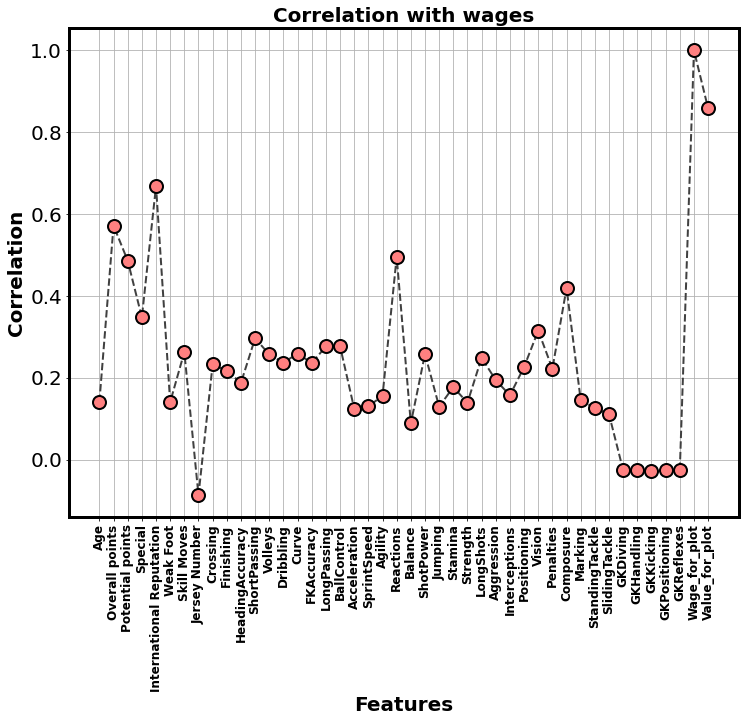

In [80]:
c1=[0.25, 0.25, 0.25] #new color 2
c2=[1, 0.5, 0.5] #new color 2
plt.plot(correl,'o--', markersize=13, markerfacecolor=c2,markeredgewidth=2,  markeredgecolor='k', linewidth=2, color=c1)
ax = plt.gca()
plt.xticks(rotation=90,fontsize=12, fontweight='bold')
plt.xlabel("Features", fontsize=20, fontweight='bold')
plt.ylabel("Correlation", fontsize=20, fontweight='bold')
plt.title("Correlation with wages", fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.gcf().set_size_inches(12, 9)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.savefig('FIFA_19_correlation_with_wages.png')
plt.show()


In [90]:
#Sort by mean points from maximum to minimum value
#Convert the count to list
correl_list=correl.tolist()
print(correl_list)


[0.14114503108397372, 0.5719260112876119, 0.4864131740517056, 0.3478354092595969, 0.6685147160240805, 0.1408233789538702, 0.2631578390403438, -0.08653973219860332, 0.23279261204705728, 0.2173996368126412, 0.1879329153125144, 0.29663820352556236, 0.25731101003791784, 0.2371069785864814, 0.25950357254574985, 0.23634257767723818, 0.27671227315146035, 0.27756558134146625, 0.12496237060766745, 0.13029170220161393, 0.1562587991038405, 0.49547062787858165, 0.08885744438438778, 0.2583048387405162, 0.12966744937366434, 0.17753047273088973, 0.13933539905115208, 0.2490388409649958, 0.19454617276111383, 0.15738684657498503, 0.22673411017212666, 0.3153388649245622, 0.22239977105241343, 0.4195214147980808, 0.14556797693555412, 0.1262679435828402, 0.11100529713318168, -0.025590410677445004, -0.025172634987951626, -0.028320185291239683, -0.025484013643626808, -0.025987060307295938, 1.0, 0.8584415602736563]


In [91]:
#Extracting unique features
feature_list=list(correl.index.values)
print(feature_list)

['Age', 'Overall points', 'Potential points', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Wage_for_plot', 'Value_for_plot']


In [92]:
from operator import itemgetter
pick_0 = itemgetter(0)
pick_1 = itemgetter(1)
x_decor = sorted(enumerate(correl_list), key=pick_1)
x_idxs = map(pick_0, x_decor)
multi_picker = itemgetter(*x_idxs)
multi_picker(feature_list)

('Jersey Number',
 'GKKicking',
 'GKReflexes',
 'GKDiving',
 'GKPositioning',
 'GKHandling',
 'Balance',
 'SlidingTackle',
 'Acceleration',
 'StandingTackle',
 'Jumping',
 'SprintSpeed',
 'Strength',
 'Weak Foot',
 'Age',
 'Marking',
 'Agility',
 'Interceptions',
 'Stamina',
 'HeadingAccuracy',
 'Aggression',
 'Finishing',
 'Penalties',
 'Positioning',
 'Crossing',
 'FKAccuracy',
 'Dribbling',
 'LongShots',
 'Volleys',
 'ShotPower',
 'Curve',
 'Skill Moves',
 'LongPassing',
 'BallControl',
 'ShortPassing',
 'Vision',
 'Special',
 'Composure',
 'Potential points',
 'Reactions',
 'Overall points',
 'International Reputation',
 'Value_for_plot',
 'Wage_for_plot')

In [98]:
correl_list.sort()
feature_sorted=multi_picker(feature_list)
print(correl_list)

[-0.08653973219860332, -0.028320185291239683, -0.025987060307295938, -0.025590410677445004, -0.025484013643626808, -0.025172634987951626, 0.08885744438438778, 0.11100529713318168, 0.12496237060766745, 0.1262679435828402, 0.12966744937366434, 0.13029170220161393, 0.13933539905115208, 0.1408233789538702, 0.14114503108397372, 0.14556797693555412, 0.1562587991038405, 0.15738684657498503, 0.17753047273088973, 0.1879329153125144, 0.19454617276111383, 0.2173996368126412, 0.22239977105241343, 0.22673411017212666, 0.23279261204705728, 0.23634257767723818, 0.2371069785864814, 0.2490388409649958, 0.25731101003791784, 0.2583048387405162, 0.25950357254574985, 0.2631578390403438, 0.27671227315146035, 0.27756558134146625, 0.29663820352556236, 0.3153388649245622, 0.3478354092595969, 0.4195214147980808, 0.4864131740517056, 0.49547062787858165, 0.5719260112876119, 0.6685147160240805, 0.8584415602736563, 1.0]


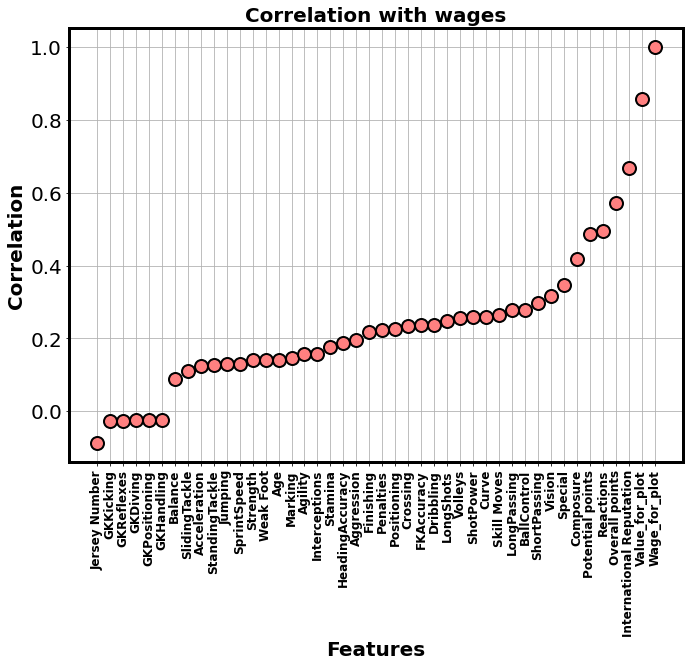

In [101]:
c1=[0.25, 0.25, 0.25] #new color 2
c2=[1, 0.5, 0.5] #new color 2
plt.plot(feature_sorted,correl_list,'o', markersize=13, markerfacecolor=c2,markeredgewidth=2,  markeredgecolor='k')
ax = plt.gca()
plt.xticks(rotation=90,fontsize=12, fontweight='bold')
plt.xlabel("Features", fontsize=20, fontweight='bold')
plt.ylabel("Correlation", fontsize=20, fontweight='bold')
plt.title("Correlation with wages", fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.gcf().set_size_inches(11, 8)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.savefig('FIFA_19_correlation_sorted_with_wages.png')
plt.show()

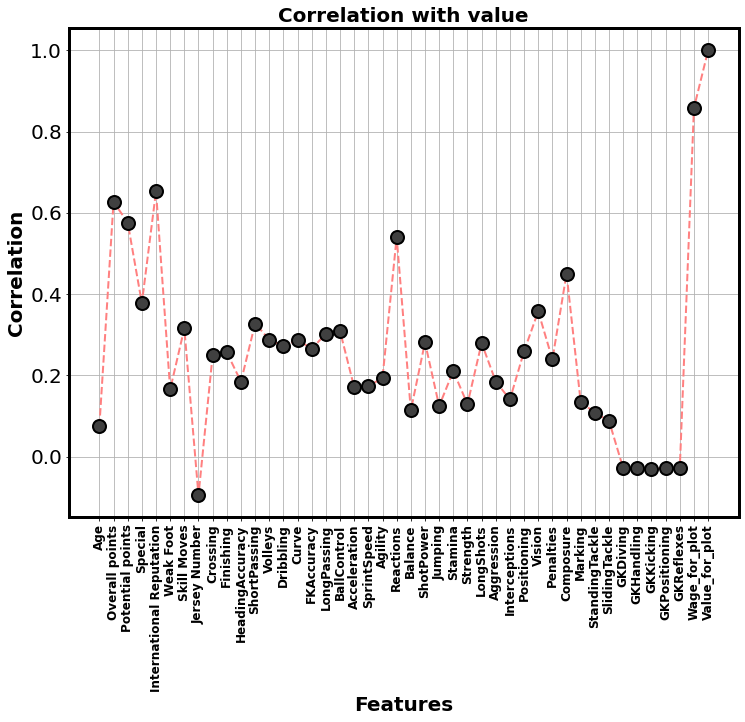

In [81]:
c1=[0.25, 0.25, 0.25] #new color 2
c2=[1, 0.5, 0.5] #new color 2
plt.plot(correlv,'o--', markersize=13, markerfacecolor=c1,markeredgewidth=2,  markeredgecolor='k', linewidth=2, color=c2)
ax = plt.gca()
plt.xticks(rotation=90,fontsize=12, fontweight='bold')
plt.xlabel("Features", fontsize=20, fontweight='bold')
plt.ylabel("Correlation", fontsize=20, fontweight='bold')
plt.title("Correlation with value", fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)
plt.grid()
plt.gcf().set_size_inches(12, 9)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.savefig('FIFA_19_correlation_with_value.png')
plt.show()